In [1]:
import math
import yfinance as yf
import pandas as pd
import numpy as np
path = "finviz.csv"

def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]


tickers = get_column_from_csv(path, "Ticker")
tickers = tickers.tolist()
print("len: ", len(tickers))
print(tickers[0])

len:  3157
A


In [8]:
# Get intraday data for today for each ticker
intradayData = yf.download(tickers, period="1d", interval="5m")
intradayData = intradayData["Adj Close"].fillna(method="ffill")

[*********************100%***********************]  3157 of 3157 completed

75 Failed downloads:
- BNFT: No data found for this date range, symbol may be delisted
- FINMU: No data found for this date range, symbol may be delisted
- JCIC: No data found for this date range, symbol may be delisted
- POWRU: No data found for this date range, symbol may be delisted
- CONX: No data found for this date range, symbol may be delisted
- SVFA: No data found for this date range, symbol may be delisted
- SPNE: No data found for this date range, symbol may be delisted
- TMKRU: No data found for this date range, symbol may be delisted
- LPI: No data found for this date range, symbol may be delisted
- DRAY: No data found for this date range, symbol may be delisted
- GFX: No data found for this date range, symbol may be delisted
- HCMA: No data found for this date range, symbol may be delisted
- NSTB: No data found for this date range, symbol may be delisted
- POSH: No data found for this date range, s

In [11]:
intradayData.tail()

,A,AA,AAC,AADI,AAL,AAN,AAON,AAP,AAPL,AAT,...,ZM,ZNTL,ZS,ZT,ZTR,ZTS,ZUMZ,ZUO,ZWS,ZYXI
2023-02-17 15:05:00-05:00,148.479996,46.930000,10.22,11.80,16.485001,14.795,80.639999,149.240005,152.389999,26.270000,...,75.470001,19.940001,131.220001,NaN,6.7299,172.690002,25.385000,8.985,23.395000,12.98
2023-02-17 15:10:00-05:00,148.160004,46.840000,10.22,11.80,16.475000,14.770,80.589996,149.179993,152.240494,26.260000,...,75.429901,19.889999,131.199997,NaN,6.7300,172.520905,25.410000,8.955,23.375000,13.00
2023-02-17 15:15:00-05:00,147.869995,46.880001,10.22,11.79,16.465000,14.760,80.550003,149.264999,152.220001,26.260000,...,75.440002,19.889999,131.080002,NaN,6.7300,172.410004,25.385000,8.955,23.355000,13.00
2023-02-17 15:20:00-05:00,147.809998,46.910000,10.22,11.79,16.424999,14.765,80.550003,149.520004,152.072006,26.230000,...,75.540001,19.830000,131.000000,NaN,6.7250,172.300003,25.389999,8.925,23.352501,12.99
2023-02-17 15:25:00-05:00,147.949997,47.070000,10.22,11.79,16.445000,14.770,80.550003,149.580002,152.199997,26.245001,...,75.555000,19.830000,130.985001,NaN,6.7250,172.279999,25.389999,8.895,23.344999,12.99


In [3]:
dailyCloses = pd.read_csv("AllClosingPricesToday.csv")
dailyCloses = dailyCloses[-64:-1:]

In [4]:
dailyCloses.tail()

,Date,A,AA,AAC,AADI,AAL,AAN,AAON,AAP,AAPL,...,ZM,ZNTL,ZS,ZT,ZTR,ZTS,ZUMZ,ZUO,ZWS,ZYXI
15383,2023-02-10 00:00:00-05:00,152.550003,48.689999,10.21,11.75,16.280001,14.64,75.220001,151.800003,151.009995,...,74.209999,20.549999,133.869995,10.0600,6.75,158.330002,25.080000,8.55,23.250000,12.59
15384,2023-02-13 00:00:00-05:00,154.600006,47.950001,10.20,11.90,16.510000,14.81,77.800003,152.190002,153.850006,...,76.480003,20.459999,133.869995,10.0500,6.78,163.139999,25.610001,8.84,23.500000,12.75
15385,2023-02-14 00:00:00-05:00,153.039993,48.930000,10.22,11.82,16.790001,14.84,78.250000,150.759995,153.199997,...,77.900002,20.059999,136.190002,10.0500,6.78,171.899994,24.830000,8.86,23.889999,12.70
15386,2023-02-15 00:00:00-05:00,151.750000,48.410000,10.20,11.87,16.799999,15.07,78.959999,151.289993,155.330002,...,80.769997,20.370001,142.770004,10.0500,6.76,175.020004,25.530001,9.19,24.379999,12.97
15387,2023-02-16 00:00:00-05:00,148.279999,48.770000,10.22,11.70,16.389999,14.87,78.680000,150.190002,153.710007,...,77.910004,19.469999,132.929993,10.0954,6.74,173.929993,25.219999,9.07,23.530001,12.89


In [ ]:
intradayData.to_csv("intradayData.csv")

In [5]:
#get the highest price for each ticker
highs = dailyCloses.max()
highs.tail()

ZTS     175.020004
ZUMZ     28.200001
ZUO           9.19
ZWS      24.959999
ZYXI     16.799999
dtype: object

In [9]:
# Count the number of tickers where the intraday high is greater than the daily high 
counts = []
for i in range(intradayData.shape[0]):
    count = 0
    for ticker in intradayData:
        if intradayData[ticker][i] > highs[ticker]:
            count += 1
    counts.append(count)



[109, 110, 112, 96, 79, 72, 73, 92, 105, 113, 132, 132, 130, 133, 129, 114, 107, 103, 106, 97, 102, 106, 101, 95, 102, 97, 109, 106, 113, 100, 105, 114, 119, 132, 132, 140, 137, 137, 137, 128, 130, 119, 126, 122, 121, 131, 144, 139, 138, 134, 137, 138, 141, 134, 136, 148, 150, 138, 142, 161, 165, 167, 175, 167, 171, 180, 176, 181, 183, 184, 184, 176, 178]


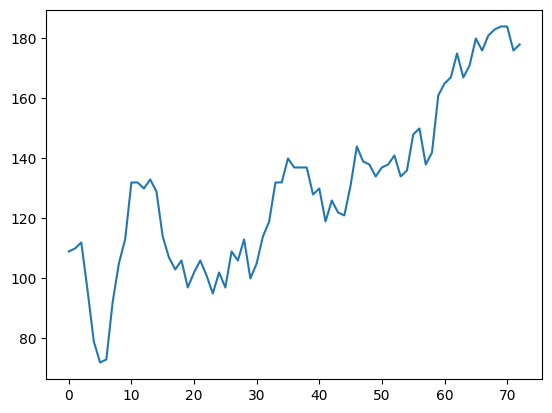

In [10]:
print(counts)
import matplotlib.pyplot as plt
ys = counts
xs = range(len(ys))
plt.plot(xs, ys)
plt.show()

plt.close()
